# Census Income Project

## Data Description
The task is to predict whether a person makes over $50K a year using the data which was extracted from the 1994 Census bureau database.

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
df=pd.read_csv('Salary Prediction')

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Data has been imported and we can see the first 5 rows of the data using df.head() function

## Exploratory Data Analysis

In [3]:
df.shape

(32560, 15)

This is the shape of data

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

These are the datatypes of each columns which includes integer and object values 

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

These are the columns of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The data does not have null values

In [8]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


There is a huge difference between 75th percentile and Mx column in Capital_gain, Capital_loss

Standard deviation is higher in Age,Capital_gain,Capital_loss columns.

In [9]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

This column only has two data- Greater than 50K and less than equal to 50K

In [10]:
df.Capital_gain.unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [11]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

## Using LabelEncoder for data type conversion

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [13]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

All the object data converted to integer format

In [14]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


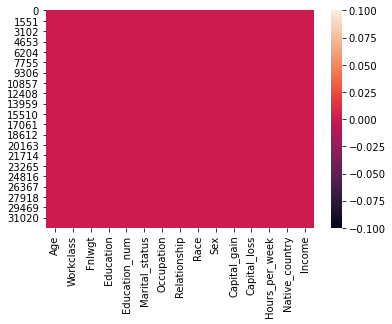

In [15]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [16]:
dfcor=df.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


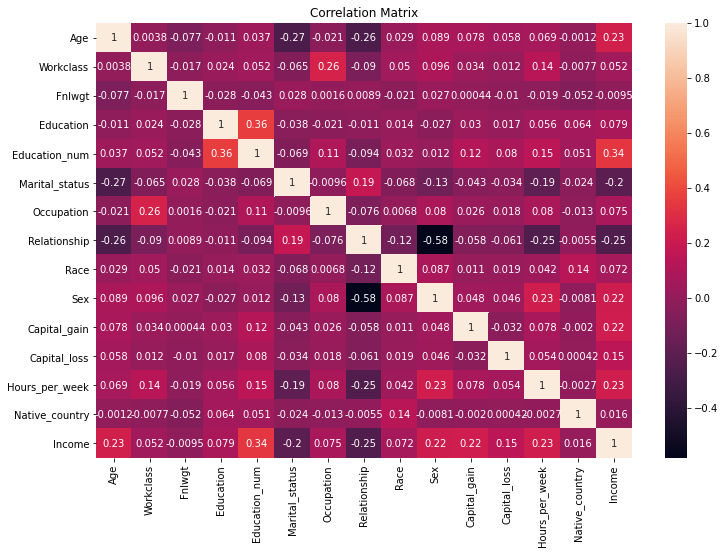

In [17]:
plt.figure(figsize=[12,8])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Relationship and Sex are negatively correlated to each other.

Income is positively correlated with Education_num and age.

Income is negatively correlated with Marital_status and Relationship.

Education and Education_num are positively correlated with each other.

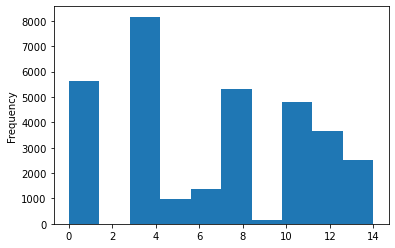

In [18]:
df['Occupation'].plot.hist()

Occuption group 4 has highest frequency

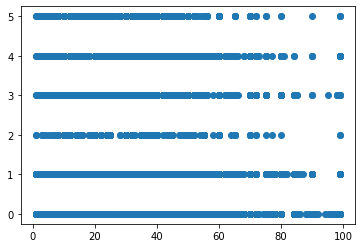

In [19]:
plt.scatter(df['Hours_per_week'],df['Relationship'])
plt.show()

This shows the relation between Hours_per_week and relationship

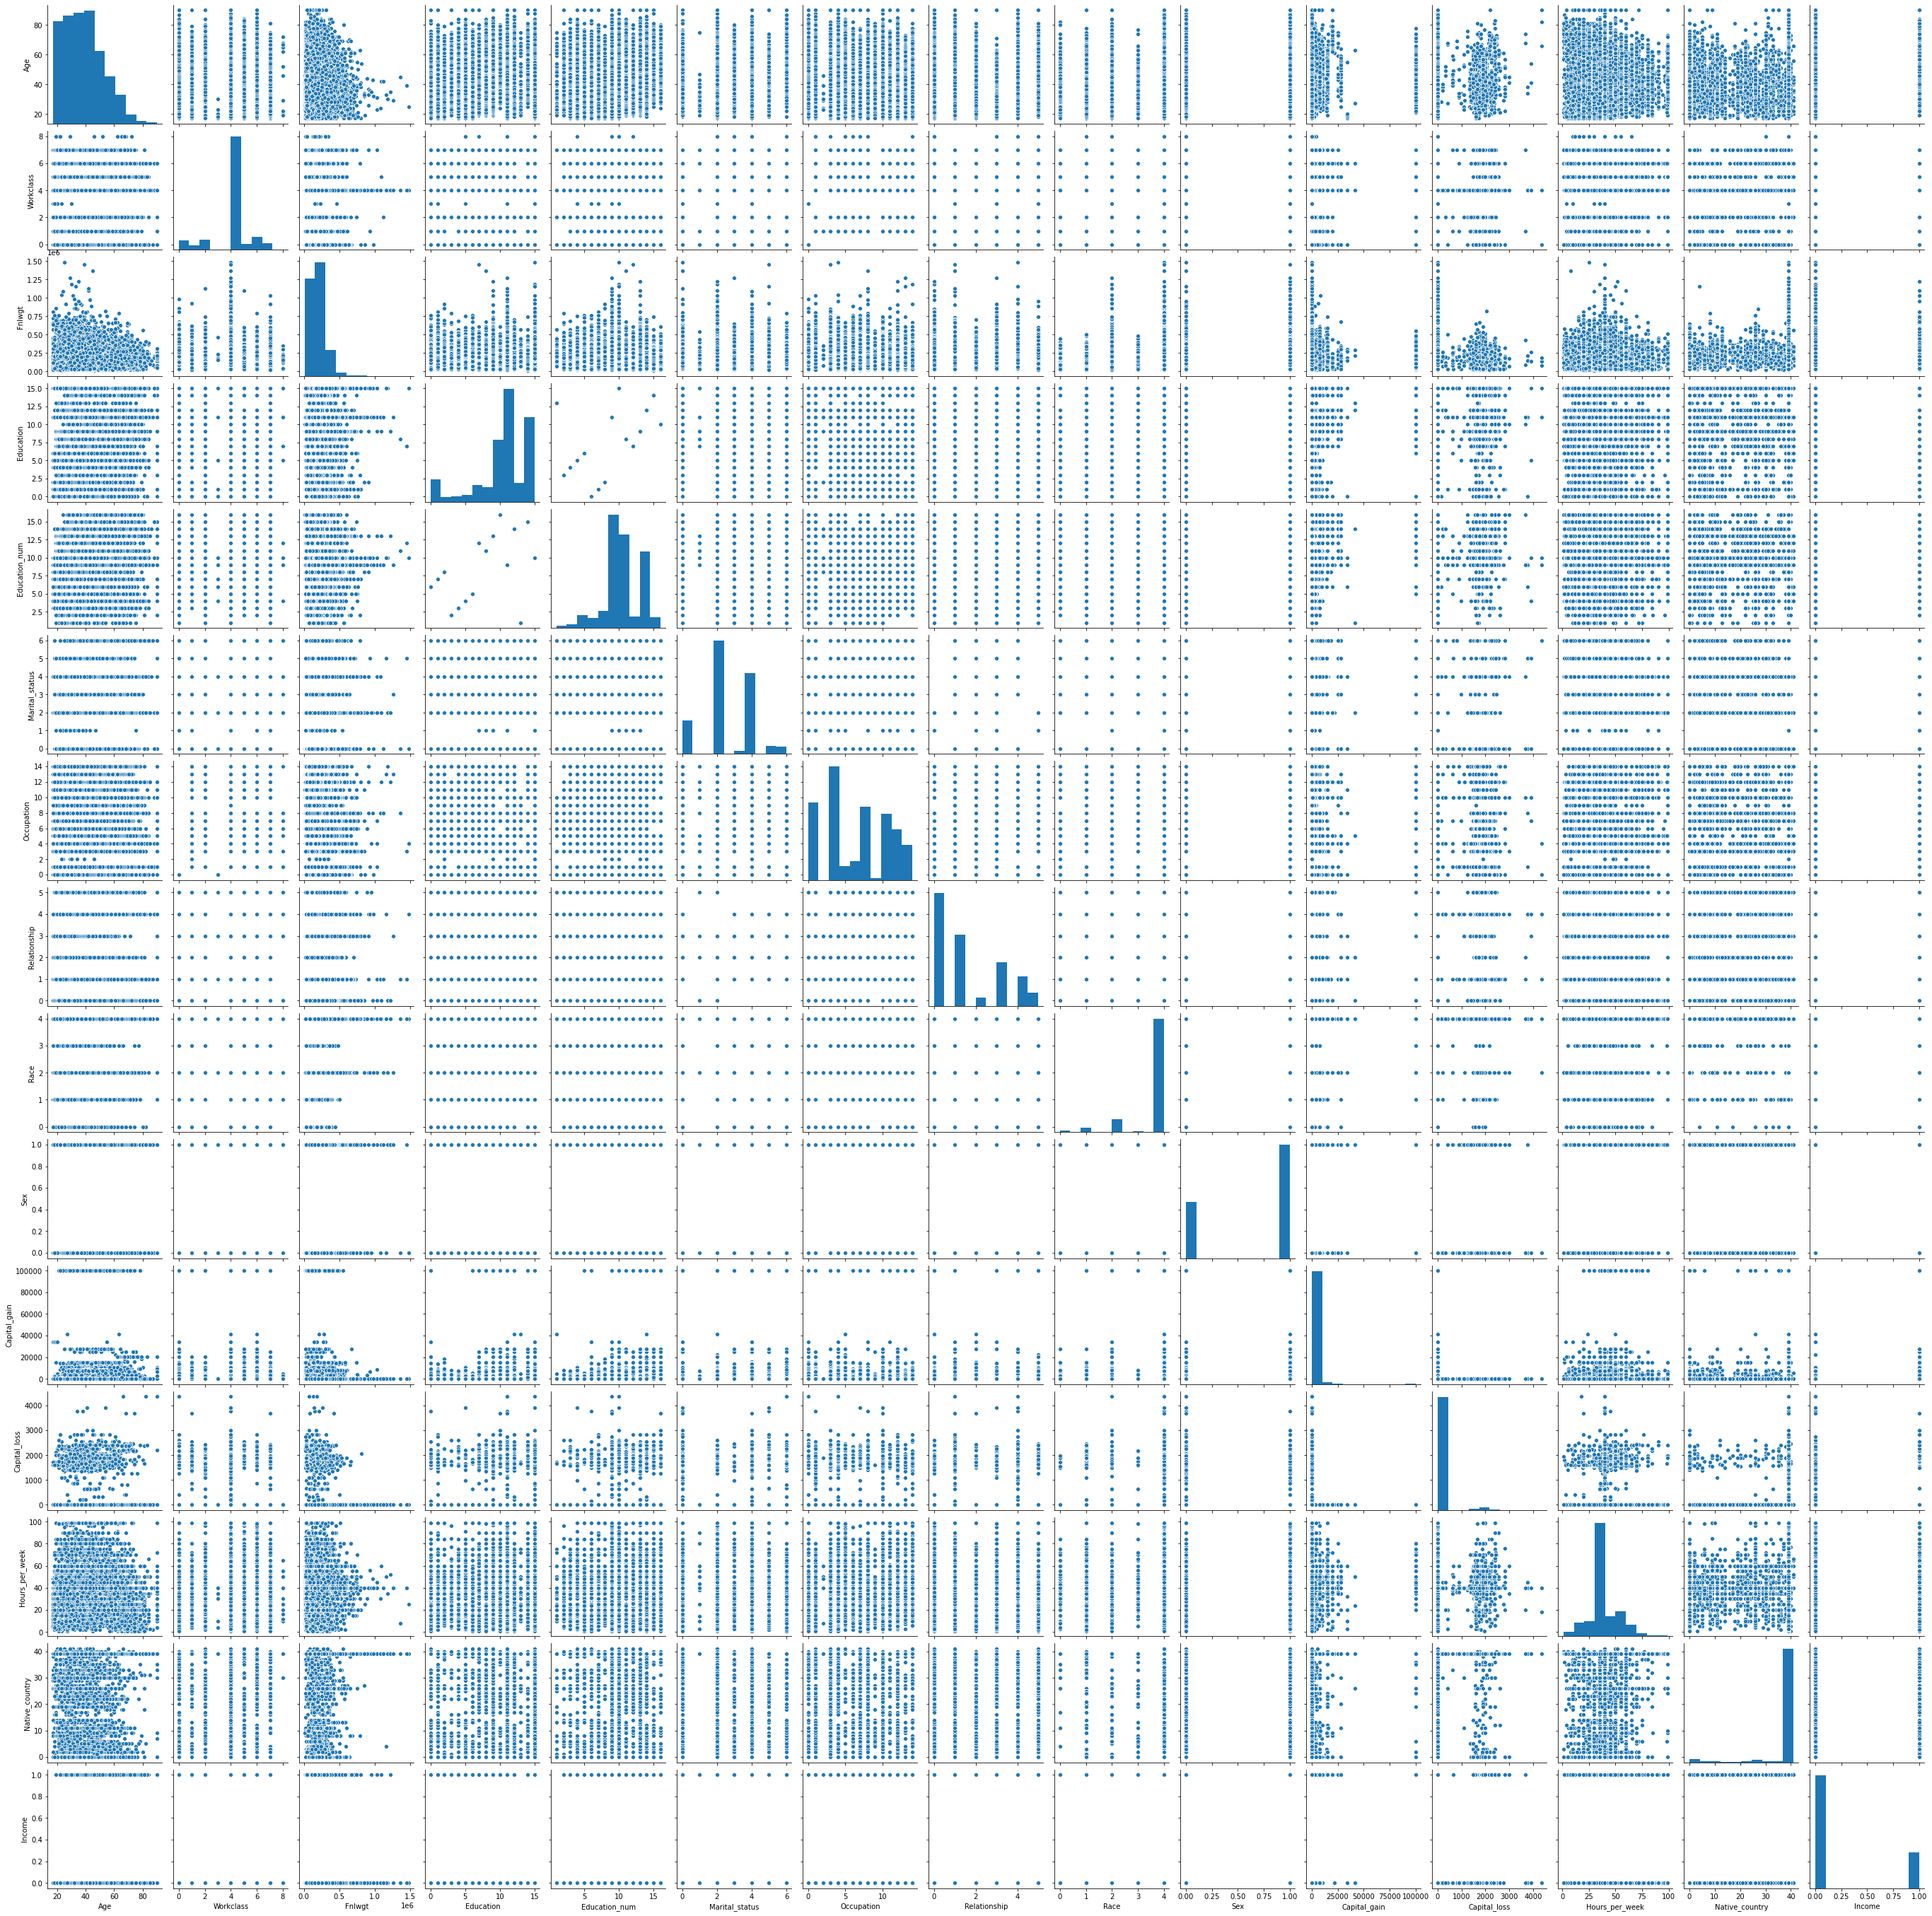

In [97]:
sns.pairplot(df)

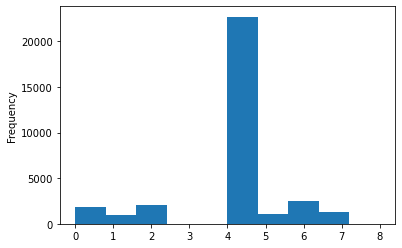

In [20]:
df['Workclass'].plot.hist()

Frequency is high for workclass group 4

## Checking Outliers using boxplot

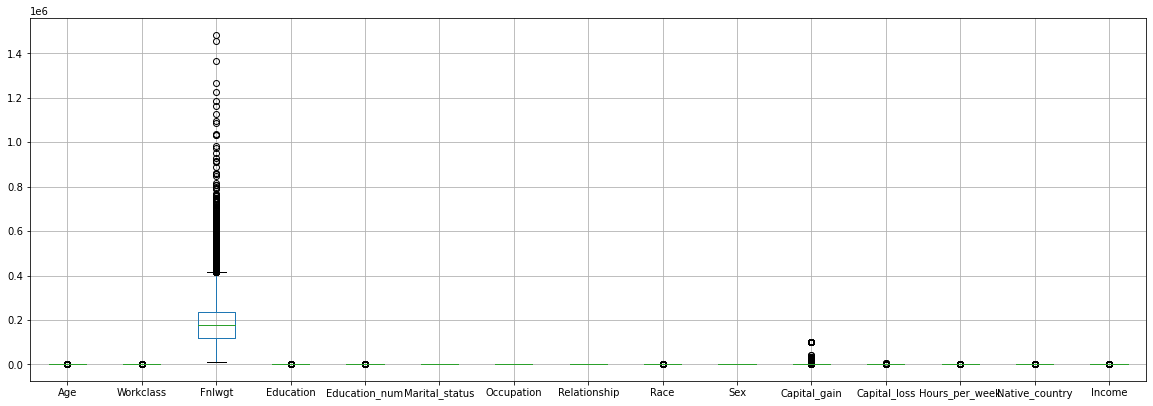

In [25]:
df.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in WorkClass,Fnlwgt,Education,Race, Capital_gain

In [26]:
collist=df.columns.values
ncol=35
nrows=11

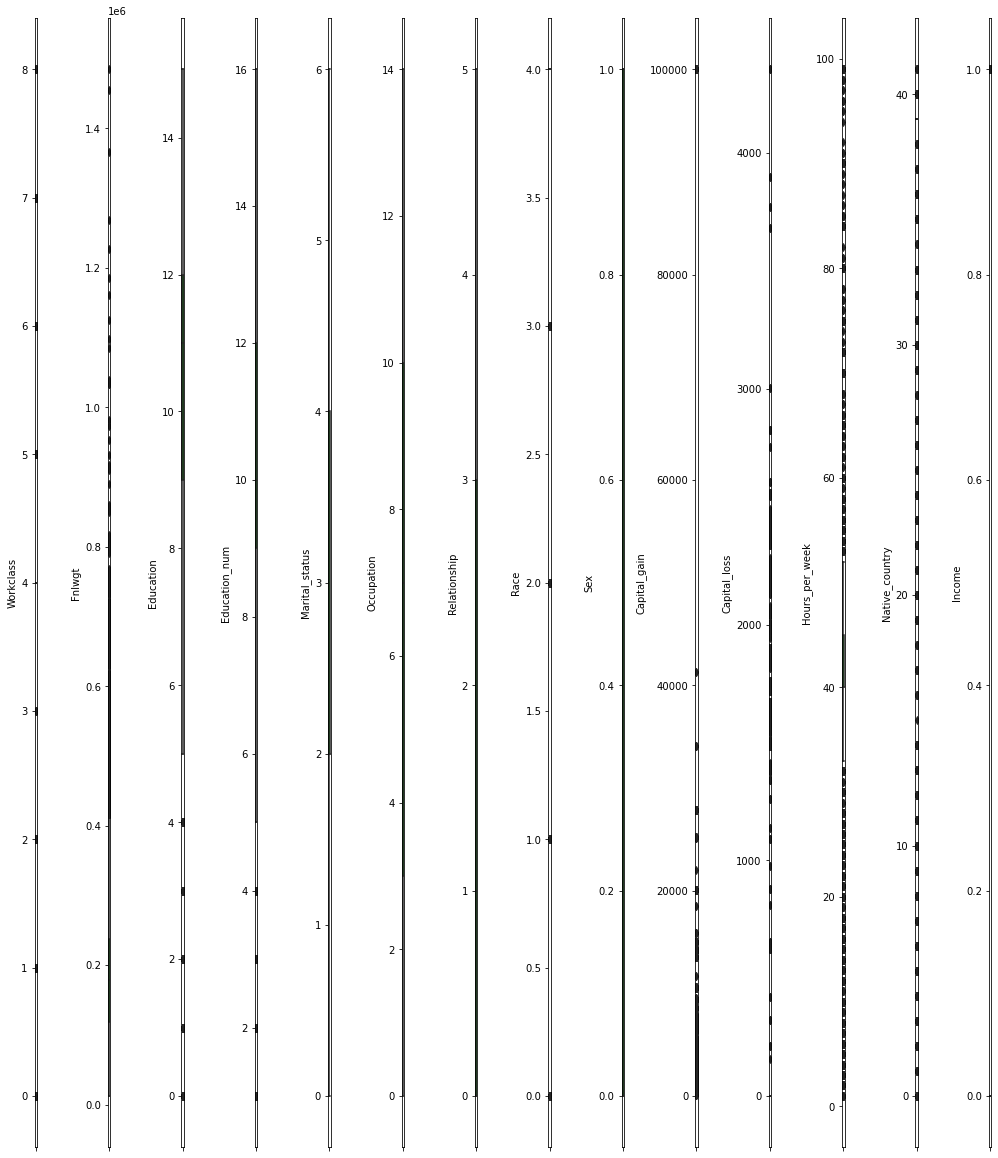

In [27]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

## Removing Outliers

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [29]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [30]:
z[3][13]

4.054156655343599

In [31]:
z[32552][8]

3.1407120742466126

In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
 df.shape

(32560, 15)

In [34]:
df_new.shape

(27417, 15)

In [35]:
loss_percent=(32560-27417)/32560*100
print(loss_percent)

15.795454545454547


## Checking skewness

In [62]:
x=df_new.drop("Income",axis=1)

In [63]:
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

There is skewness in Fnlwgt,Race,Capital_gain,Capital_loss,Native_country,Workclass,Relationship

## Removing skewness

In [64]:
from sklearn.preprocessing import power_transform
df_income=power_transform(x)
df_income=pd.DataFrame(df_income,columns=x.columns)

In [65]:
df_income.skew()

Age               -0.018272
Workclass          0.073827
Fnlwgt            -0.035195
Education         -0.314997
Education_num      0.028000
Marital_status    -0.128651
Occupation        -0.182675
Relationship       0.108587
Race              -2.533505
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week     0.104401
Native_country     0.777698
dtype: float64

Skewness is removed from few columns

In [66]:
x=df_income

In [67]:
x.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
27412,-0.801388,0.016698,0.798010,-0.997327,0.803823,-0.383166,1.383594,1.549009,0.347164,-1.398916,-0.297044,-0.040546,-0.220939,0.172135
27413,0.273824,0.016698,-0.220853,0.076290,-0.460394,-0.383166,0.223191,-1.108479,0.347164,0.714839,-0.297044,-0.040546,-0.038137,0.172135
27414,1.372598,0.016698,-0.248527,0.076290,-0.460394,2.161095,-1.406754,1.342986,0.347164,-1.398916,-0.297044,-0.040546,-0.038137,0.172135
27415,-1.327251,0.016698,0.274676,0.076290,-0.460394,0.910907,-1.406754,1.073858,0.347164,0.714839,-0.297044,-0.040546,-1.719870,0.172135
27416,1.041172,0.801205,1.063343,0.076290,-0.460394,-0.383166,-0.488291,1.549009,0.347164,-1.398916,3.366539,-0.040546,-0.038137,0.172135


In [68]:
y=df_new["Income"]

In [69]:
y.tail()

32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, dtype: int32

## Finding the best Random_State

In [71]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8390469243860929  on Random_state 37


## Creating train-test split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)

In [73]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [74]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.7639192803306589
[[4853 1590]
 [ 352 1431]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      6443
           1       0.47      0.80      0.60      1783

    accuracy                           0.76      8226
   macro avg       0.70      0.78      0.71      8226
weighted avg       0.83      0.76      0.78      8226



Accuracy_score of SVC() is :
0.8463408704108923
[[6103  340]
 [ 924  859]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6443
           1       0.72      0.48      0.58      1783

    accuracy                           0.85      8226
   macro avg       0.79      0.71      0.74      8226
weighted avg       0.84      0.85      0.83      8226



Accuracy_score of DecisionTreeClassifier() is :
0.8112083637247751
[[5613  830]
 [ 723 1060]]
              precision    recall  f1-score   support

           0       0.89      0.87   

RandomForest classifier  has highest accuracy compared to others which is 85

## Cross validation

In [75]:
svr=SVC()

In [76]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.8381297447065681


In [79]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(svrscores.mean())

0.8381297447065681


In [80]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.8381297447065681


In [81]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.8050844776767073


In [82]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.8529016416101063


In [83]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.8285736178384671


Cross validation scores can be observed

Minimum difference between accuracy_score and cross validation for SVC,DT and logistic Regression is same that is 1,so we can go for logistic regression.

## Hyper parameter Tunning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [86]:
parameters= {'max_iter':np.arange(2,15),
            'penalty':['l1','l2']}

In [87]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'penalty': ['l1', 'l2']})

In [89]:
GCV.best_params_

{'max_iter': 5, 'penalty': 'l2'}

In [90]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [91]:
accuracy_score(y_test,GCV_pred)

0.8389253586190129

## AUC_ROC Curve

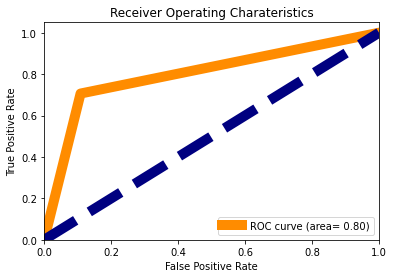

In [95]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(predm,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics')
plt.legend(loc="lower right" )
plt.show()

## Saving the best Model

In [96]:
import joblib
joblib.dump(GCV.best_estimator_,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']